In [1]:
import findspark
findspark.init()

In [2]:
from pyspark import SparkContext, SparkConf

In [3]:
sc = SparkContext().getOrCreate();

In [4]:
from pyspark.sql import SQLContext, Row
sqlContext = SQLContext(sc)

In [5]:
rdd = sc.textFile("well-data.csv")

In [6]:
def process(line):
    l=line.split(",")
    return l

In [7]:
new_rdd=rdd.map(process)
new_rdd.take(2)

[['Ideal_PH', 'Well_deep', 'Water_temp', 'jet_pump', 'rainy_area', 'validity'],
 ['7', '33', '2', '1', '0', '0']]

In [8]:
header = new_rdd.first()
print(header)
dataLines= new_rdd.filter(lambda ln: ln != header)
dataLines.take(2)

['Ideal_PH', 'Well_deep', 'Water_temp', 'jet_pump', 'rainy_area', 'validity']


[['7', '33', '2', '1', '0', '0'], ['7', '55', '3', '0', '0', '1']]

In [9]:
def convert_toRows(line):
    r=Row(Ideal_PH=float(line[0]),Well_deep=int(line[1]),Water_temp=int(line[2]),jet_pump=int(line[3]),
          rainy_area=int(line[4]),validity=int(line[5]))
    return r

rows=dataLines.map(convert_toRows)
rows.take(2)


[Row(Ideal_PH=7.0, Water_temp=2, Well_deep=33, jet_pump=1, rainy_area=0, validity=0),
 Row(Ideal_PH=7.0, Water_temp=3, Well_deep=55, jet_pump=0, rainy_area=0, validity=1)]

In [10]:
#tmp_rows=rows.take(20)
#tmp_df=sqlContext.createDataFrame(tmp_rows)
#tmp_df.show()
#print(type(tmp_df))

df = sqlContext.createDataFrame(rows)
df.show()

+--------+----------+---------+--------+----------+--------+
|Ideal_PH|Water_temp|Well_deep|jet_pump|rainy_area|validity|
+--------+----------+---------+--------+----------+--------+
|     7.0|         2|       33|       1|         0|       0|
|     7.0|         3|       55|       0|         0|       1|
|     6.0|         3|       58|       1|         0|       0|
|     6.0|         3|       42|       0|         0|       1|
|     6.0|         2|       43|       0|         1|       0|
|     6.0|         2|       36|       0|         1|       1|
|     7.0|         2|       35|       0|         0|       1|
|     8.0|         2|       30|       0|         1|       0|
|     6.0|         3|       36|       0|         1|       1|
|     8.0|         3|       56|       0|         0|       0|
|     8.0|         2|       52|       1|         1|       0|
|     8.0|         2|       57|       0|         1|       1|
|     6.0|         3|       56|       1|         0|       0|
|     7.0|         2|   

In [11]:
#a_list = df.select('age').collect()
#age_arr = [int(row.age) for row in a_list]
#age_arr

In [12]:
#temporary table that registerated to run sql statements
df.registerTempTable("myTab") 

In [34]:
#res = sqlContext.sql("SELECT * FROM myTab WHERE age > 20")
#res.show()

ph_list=sqlContext.sql("SELECT Ideal_PH FROM myTab").collect()
ph_arr=[int(row.Ideal_PH) for row in ph_list]

temp_list=sqlContext.sql("SELECT Water_temp FROM myTab").collect()
temp_arr=[int(row.Water_temp) for row in temp_list]

deep_list=sqlContext.sql("SELECT Well_deep FROM myTab").collect()
deep_arr=[int(row.Well_deep) for row in deep_list]

pump_list=sqlContext.sql("SELECT jet_pump FROM myTab").collect()
pump_arr=[int(row.jet_pump) for row in pump_list]

rainy_list=sqlContext.sql("SELECT rainy_area FROM myTab").collect()
rainy_arr=[int(row.rainy_area) for row in rainy_list]

valid_list=sqlContext.sql("SELECT validity FROM myTab").collect()
valid_arr=[int(row.validity) for row in valid_list]

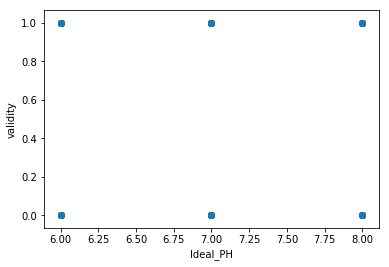

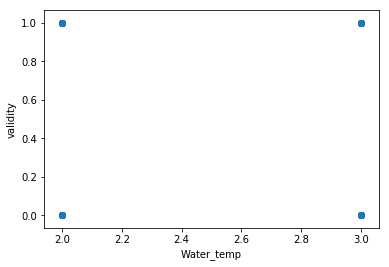

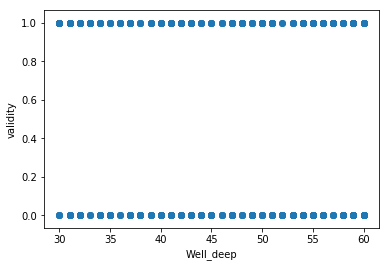

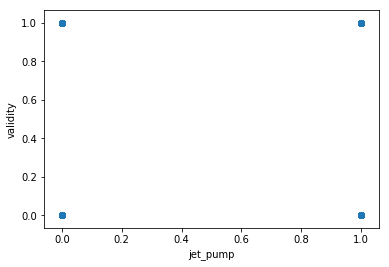

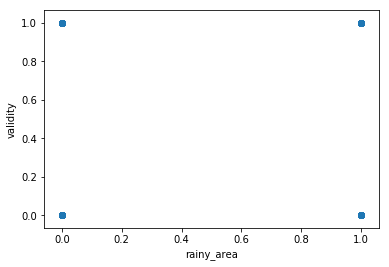

In [30]:
import matplotlib.pyplot as plt

plt.scatter(ph_arr,valid_arr)
plt.xlabel("Ideal_PH")
plt.ylabel("validity")
plt.show()

plt.scatter(temp_arr,valid_arr)
plt.xlabel("Water_temp")
plt.ylabel("validity")
plt.show()

plt.scatter(deep_arr,valid_arr)
plt.xlabel("Well_deep")
plt.ylabel("validity")
plt.show()

plt.scatter(pump_arr,valid_arr)
plt.xlabel("jet_pump")
plt.ylabel("validity")
plt.show()

plt.scatter(rainy_arr,valid_arr)
plt.xlabel("rainy_area")
plt.ylabel("validity")
plt.show()

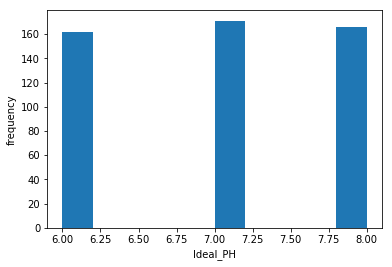

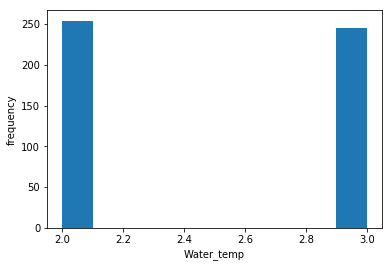

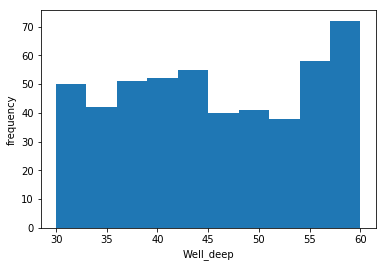

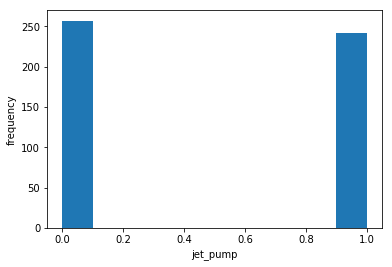

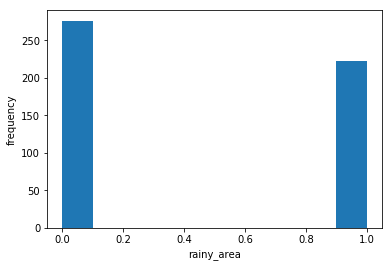

In [44]:
plt.hist(ph_arr)
plt.xlabel("Ideal_PH")
plt.ylabel("frequency")
plt.show()

plt.hist(temp_arr)
plt.xlabel("Water_temp")
plt.ylabel("frequency")
plt.show()

plt.hist(deep_arr)
plt.xlabel("Well_deep")
plt.ylabel("frequency")
plt.show()

plt.hist(pump_arr)
plt.xlabel("jet_pump")
plt.ylabel("frequency")
plt.show()

plt.hist(rainy_arr)
plt.xlabel("rainy_area")
plt.ylabel("frequency")
plt.show()

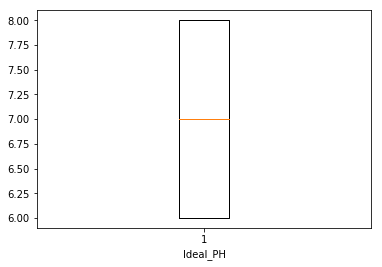

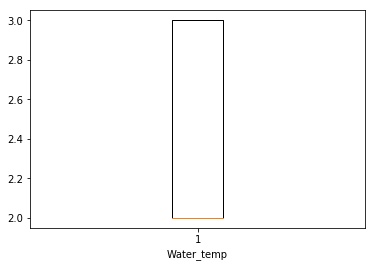

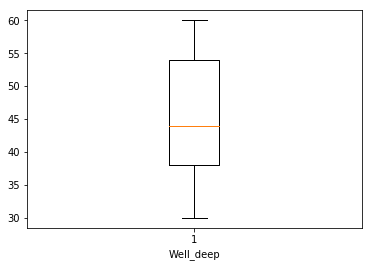

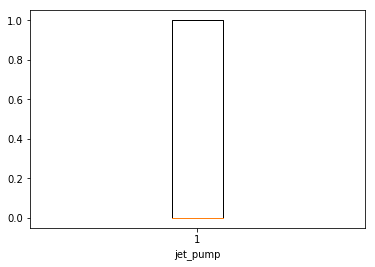

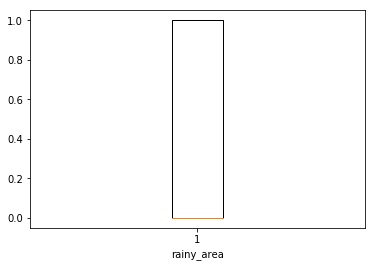

In [16]:
plt.boxplot(ph_arr)
plt.xlabel("Ideal_PH")
plt.show()

plt.boxplot(temp_arr)
plt.xlabel("Water_temp")
plt.show()

plt.boxplot(deep_arr)
plt.xlabel("Well_deep")
plt.show()

plt.boxplot(pump_arr)
plt.xlabel("jet_pump")
plt.show()

plt.boxplot(rainy_arr)
plt.xlabel("rainy_area")
plt.show()


In [17]:
#import math
#from pyspark.mllib.linalg import Vectors
#from pyspark.mllib.regression import LabeledPoint
#from numpy import array

import math
from pyspark.ml.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint
from numpy import array

In [18]:
#labelPoint that MLLIB can use.All data must be numeric
def vector_data(fields):
    ph = float(fields[0])
    deep = int(fields[1])
    temp = int(fields[2])
    pump = int(fields[3])
    rainy = int(fields[4])
    valid = int(fields[5])
    return Vectors.dense([ph,deep,temp,pump,rainy,valid])

autoVectors = dataLines.map(vector_data)
autoVectors.take(2)

[DenseVector([7.0, 33.0, 2.0, 1.0, 0.0, 0.0]),
 DenseVector([7.0, 55.0, 3.0, 0.0, 0.0, 1.0])]

In [20]:
def transformToLabelPoint (instr):
    lp = (float(instr[5]),Vectors.dense([instr[0],instr[1],instr[2],instr[3],instr[4]]))
    return lp

autoLp= autoVectors.map(transformToLabelPoint)
autoDF = sqlContext.createDataFrame(autoLp,["label","features"])
autoDF.select("label","features").show(2)


+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[7.0,33.0,2.0,1.0...|
|  1.0|[7.0,55.0,3.0,0.0...|
+-----+--------------------+
only showing top 2 rows



In [21]:
#Split into training and testing data
(trainingData, testData) = autoDF.randomSplit([0.9, 0.1],42)
dataLines.count(),trainingData.count(),testData.count()



(499, 447, 52)

In [22]:
#Build the model on training datal
#from pyspark.ml.regression import LinearRegression
from pyspark.ml.classification import LogisticRegression


In [23]:
#lr = LinearRegression(maxIter=10)
#lrModel = lr.fit(trainingData)
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(trainingData)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

print("Coefficients:"+str(lrModel.coefficients))

print("Intercept:"+str(lrModel.intercept))

#Predict on test data
predictions = lrModel.transform(testData)
predictions.select("prediction","label","features").show()
#predictions.select("*").show()

from pyspark.ml.evaluation import RegressionEvaluator
evaluator =  RegressionEvaluator(predictionCol="prediction",labelCol="label",metricName="r2")

evaluator.evaluate(predictions)


In [25]:
predictions.columns

['label', 'features', 'rawPrediction', 'probability', 'prediction']

In [26]:
predictions.take(5)

[Row(label=0.0, features=DenseVector([6.0, 35.0, 3.0, 0.0, 1.0]), rawPrediction=DenseVector([-0.5981, 0.5981]), probability=DenseVector([0.3548, 0.6452]), prediction=1.0),
 Row(label=0.0, features=DenseVector([6.0, 42.0, 3.0, 1.0, 1.0]), rawPrediction=DenseVector([-0.2052, 0.2052]), probability=DenseVector([0.4489, 0.5511]), prediction=1.0),
 Row(label=0.0, features=DenseVector([6.0, 58.0, 2.0, 0.0, 0.0]), rawPrediction=DenseVector([0.347, -0.347]), probability=DenseVector([0.5859, 0.4141]), prediction=0.0),
 Row(label=0.0, features=DenseVector([7.0, 38.0, 3.0, 0.0, 1.0]), rawPrediction=DenseVector([-0.483, 0.483]), probability=DenseVector([0.3816, 0.6184]), prediction=1.0),
 Row(label=0.0, features=DenseVector([7.0, 40.0, 2.0, 0.0, 0.0]), rawPrediction=DenseVector([0.2798, -0.2798]), probability=DenseVector([0.5695, 0.4305]), prediction=0.0)]

In [37]:
#predictions.select("prediction","label","features").collect()

In [29]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#Predict on Test data
#Adding prediction column
predictions= lrModel.transform(testData)
#predictions.select("*").show()
predictions.select("prediction","label","features").collect()

evaluator = MulticlassClassificationEvaluator(predictionCol="prediction",
                                              labelCol="label",
                                              metricName="f1")
evaluator.evaluate(predictions)

#Draw a confusion Matrix
#labelList = predictions.select("indexed","label").distinct()
#predictions.select("*").distinct().show()
#predictions.groupBy("indexed","prediction").count().show()



0.49393939393939396

## decision tree 

In [39]:

#Create the Model
dtClassifier= DecisionTreeClassifier(featuresCol='features' ,maxDepth=5,labelCol="label")
dtModel = dtClassifier.fit(trainingData)

In [38]:
from pyspark.ml.classification import DecisionTreeClassifier

In [43]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#Predict on Test data
#Adding prediction column
predictions= dtModel.transform(testData)
#predictions.select("*").show()
predictions.select("prediction","label","features").collect()

evaluator = MulticlassClassificationEvaluator(predictionCol="prediction",
                                              labelCol="label",
                                              metricName="f1")
evaluator.evaluate(predictions)

#Draw a confusion Matrix
#labelList = predictions.select("prediction","label").distinct()
#predictions.select("*").distinct().show()
#predictions.groupBy("indexed","prediction").count().show()

0.4314807999018525